In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\usepackage{newtxmath}'] 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
from matplotlib import rc

from cycler import cycler


mpl.rcParams['ps.usedistiller'] = 'xpdf' 

plt.style.use('seaborn-notebook')
# sns.set_palette("Blues_r")

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v', 's', "o"])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999

<ipython-input-1-56d1c1821bb1>:5: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\usepackage{newtxmath}']


In [2]:
# Change if required
folder = "../experiments/2021-06-09-14-26_BanditNonStaticAbruptGlobal_"
dataset = "AbruptGlobal"

In [3]:
masterdata = pd.read_csv("%s/BanditNonStaticAbruptGlobal.csv"%folder, sep=",")
narms = masterdata.iloc[0]['k']

In [4]:
sorted(masterdata.bandit.unique())

['CustomOracle',
 'MP-ADR-Elimination-UCB-ADWIN1; d=0.001',
 'MP-ADR-Elimination-UCB-ADWIN1; d=0.01',
 'MP-ADR-Elimination-UCB-ADWIN1; d=0.1',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-4',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-5',
 'MP-ADS-TS-ADWIN1; d=0.001; r=false',
 'MP-ADS-TS-ADWIN1; d=0.001; r=true',
 'MP-ADS-TS-ADWIN1; d=0.01; r=false',
 'MP-ADS-TS-ADWIN1; d=0.01; r=true',
 'MP-ADS-TS-ADWIN1; d=0.1; r=false',
 'MP-ADS-TS-ADWIN1; d=0.1; r=true',
 'MP-ADS-TS-ADWIN1; d=1.0E-4; r=false',
 'MP-ADS-TS-ADWIN1; d=1.0E-4; r=true',
 'MP-ADS-TS-ADWIN1; d=1.0E-5; r=false',
 'MP-ADS-TS-ADWIN1; d=1.0E-5; r=true',
 'MP-D-TS; g=0.7',
 'MP-D-TS; g=0.8',
 'MP-D-TS; g=0.9',
 'MP-D-TS; g=0.99',
 'MP-D-UCB; g=0.7',
 'MP-D-UCB; g=0.8',
 'MP-D-UCB; g=0.9',
 'MP-D-UCB; g=0.99',
 'MP-E-G; e=0.7',
 'MP-E-G; e=0.8',
 'MP-E-G; e=0.9',
 'MP-E-G; e=0.99',
 'MP-GLR-KL-UCB-G',
 'MP-GLR-KL-UCB-G-F',
 'MP-GLR-KL-UCB-L',
 'MP-GLR-KL-UCB-L-F',
 'MP-KLUCB',
 'MP-M-UCB; w=1000; m=10',
 'MP-M-UCB; w=1000; m=100',
 'M

In [5]:
masterdata.columns

Index(['bandit', 'dataset', 'scalingstrategy', 'k', 'gain', 'cputime',
       'iteration'],
      dtype='object')

In [6]:
masterdata['reward/arm'] = masterdata['gain']/masterdata['k']

In [7]:
masterdata.shape

(1710000, 8)

In [8]:
masterdata.groupby(["scalingstrategy", "bandit"])[['gain', 'k', 'reward/arm', 'cputime']].mean()

gain       k  \
scalingstrategy bandit                                                      
No-1            CustomOracle                             1.001607  1.0099   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.001   0.696029  1.0099   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.01    0.695530  1.0099   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.1     0.643082  1.0099   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-4  0.690823  1.0099   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-5  0.689984  1.0099   
                MP-ADS-TS-ADWIN1; d=0.001; r=false       0.959713  1.0099   
                MP-ADS-TS-ADWIN1; d=0.001; r=true        0.965440  1.0099   
                MP-ADS-TS-ADWIN1; d=0.01; r=false        0.960309  1.0099   
                MP-ADS-TS-ADWIN1; d=0.01; r=true         0.965724  1.0099   
                MP-ADS-TS-ADWIN1; d=0.1; r=false         0.960599  1.0099   
                MP-ADS-TS-ADWIN1; d=0.1; r=true          0.956905  1.0099   
                MP-ADS-TS-ADWIN1; d=1.0E-4; r=false      0.959793  1.0099   
                MP-ADS-TS-ADWIN1; d=1.0E-4; r=true       0.965013  1.0099   
                MP-ADS-TS-ADWIN1; d=1.0E-5; r=false      0.961153  1.0099   
                MP-ADS-TS-ADWIN1; d=1.0E-5; r=true       0.964506  1.0099   
                MP-D-TS; g=0.7                           0.699886  1.0099   
                MP-D-TS; g=0.8                           0.711477  1.0099   
                MP-D-TS; g=0.9                           0.740049  1.0099   
                MP-D-TS; g=0.99                          0.892290  1.0099   
                MP-D-UCB; g=0.7                          0.763867  1.0099   
                MP-D-UCB; g=0.8                          0.763902  1.0099   
                MP-D-UCB; g=0.9                          0.763906  1.0099   
                MP-D-UCB; g=0.99                         0.763780  1.0099   
                MP-E-G; e=0.7                            0.676520  1.0099   
                MP-E-G; e=0.8                            0.721246  1.0099   
                MP-E-G; e=0.9                            0.769097  1.0099   
                MP-E-G; e=0.99                           0.859038  1.0099   
                MP-GLR-KL-UCB-G                          0.543988  1.0099   
                MP-GLR-KL-UCB-G-F                        0.586857  1.0099   
                MP-GLR-KL-UCB-L                          0.531409  1.0099   
                MP-GLR-KL-UCB-L-F                        0.521165  1.0099   
                MP-KLUCB                                 0.974826  1.0099   
                MP-M-UCB; w=1000; m=10                   0.510552  1.0099   
                MP-M-UCB; w=1000; m=100                  0.510525  1.0099   
                MP-M-UCB; w=5000; m=10                   0.510535  1.0099   
                MP-M-UCB; w=5000; m=100                  0.510528  1.0099   
                MP-RExp3; b=100.0                        0.502882  1.0099   
                MP-RExp3; b=1000.0                       0.503393  1.0099   
                MP-RExp3; b=500.0                        0.503023  1.0099   
                MP-RExp3; b=5000.0                       0.502465  1.0099   
                MP-SW-TS; w=100                          0.604462  1.0099   
                MP-SW-TS; w=1000                         0.911719  1.0099   
                MP-SW-TS; w=500                          0.845653  1.0099   
                MP-SW-TS; w=5000                         0.873632  1.0099   
                MP-SW-UCB#-A; nu=0.1; l=12.3             0.607006  1.0099   
                MP-SW-UCB#-A; nu=0.2; l=12.3             0.589862  1.0099   
                MP-SW-UCB#-G; ka=0.1; l=4.3              0.506885  1.0099   
                MP-SW-UCB#-G; ka=0.2; l=4.3              0.506114  1.0099   
                MP-SW-UCB; w=100                         0.421231  1.0099   
                MP-SW-UCB; w=1000                        

In [9]:
masterdata['dataset'].unique()

array(['AbruptGlobalGenerator-100'], dtype=object)

In [10]:
from matplotlib.markers import TICKLEFT, TICKRIGHT, TICKUP, TICKDOWN, CARETLEFT, CARETRIGHT, CARETUP, CARETDOWN
markers = [
#    '.',
#    ',',
    'v',
    'o',
    '^',
    '<',
    '>',
#    '1',
#    '2',
#    '3',
#    '4',
#    '8',
    's',
    'p',
    '*',
#    'h',
    'H',
    '+',
    'x',
    'D',
#    'd',
    '|',
    '_',
    TICKLEFT,
    TICKRIGHT,
    TICKUP,
    TICKDOWN,
    CARETLEFT,
    CARETRIGHT,
    CARETUP,
    CARETDOWN,
]
 

In [11]:
algs_ours = [    
    # ours
    'MP-ADR-Elimination-UCB-ADWIN1; d=0.001',
    'MP-ADS-TS-ADWIN1; d=0.001; r=true',
#    'MP-ADS-TS-ADWIN1; d=0.001; r=false'
]
algs_pass = [
    # passive
    'MP-D-UCB; g=0.9',
    'MP-RExp3; b=1000.0',
    'MP-SW-TS; w=1000',
#    'MP-SW-UCB; w=1000',
    'MP-SW-UCB#-A; nu=0.1; l=12.3', 
    #'MP-SW-UCB#-A; nu=0.2; l=12.3', 
    'MP-SW-UCB#-G; ka=0.1; l=4.3', 
    #'MP-SW-UCB#-G; ka=0.2; l=4.3'
]
algs_act = [
    # active
    'MP-GLR-KL-UCB-G',
#    'MP-GLR-KL-UCB-L',
#    'MP-GLR-KL-UCB-G-F',
#    'MP-GLR-KL-UCB-L-F',
    'MP-M-UCB; w=1000; m=10',
#    'MP-M-UCB; w=5000; m=100',
]
algs_base = [
    # baselines
    'MP-TS',
    'MP-E-G; e=0.9',
    'OR',
    'OD',
    'OS',
    'CustomOracle'
]

In [12]:
prettynames = {
    'MP-ADR-Elimination-UCB-ADWIN1; d=0.001' : "ADR-E-UCB",
    'MP-ADS-TS-ADWIN1; d=0.001; r=true': "ADR-TS",
    'MP-ADS-TS-ADWIN1; d=0.001; r=false': "ADS-TS",
    'MP-D-UCB; g=0.9': "D-UCB",
    'MP-RExp3; b=1000.0': "RExp3",
    'MP-SW-TS; w=1000': "SW-TS",
    'MP-SW-UCB; w=1000': "SW-UCB",
    'MP-SW-UCB#-A; nu=0.1; l=12.3': "SW-UCB\#-A",
    'MP-SW-UCB#-G; ka=0.1; l=4.3': "SW-UCB\#-G",
    # active
    'MP-GLR-KL-UCB-G': 'GLR-KL-UCB',
    'MP-GLR-KL-UCB-L': 'GLR-KL-UCB-L',
    'MP-GLR-KL-UCB-G-F': 'GLR-KL-UCB-G-F',
    'MP-GLR-KL-UCB-L-F': 'GLR-KL-UCB-L-F',
#    'MP-M-UCB; w=1000; m=10': 'M-UCB; w=1000; m=10',
#    'MP-M-UCB; w=5000; m=100': 'M-UCB; w=5000; m=100',
    'MP-M-UCB; w=1000; m=10': 'M-UCB',
    # baselines
    'MP-TS': 'MP-TS',
    'MP-E-G; e=0.9': 'Espilon-Greedy',
    'OR': "Random Oracle",
    'OD': "Dynamic Oracle",
    'OS': "Static Oracle",
    'CustomOracle': "Custom Oracle"
}

In [13]:
# compute regret against 'OD', or just the cumulative rewards

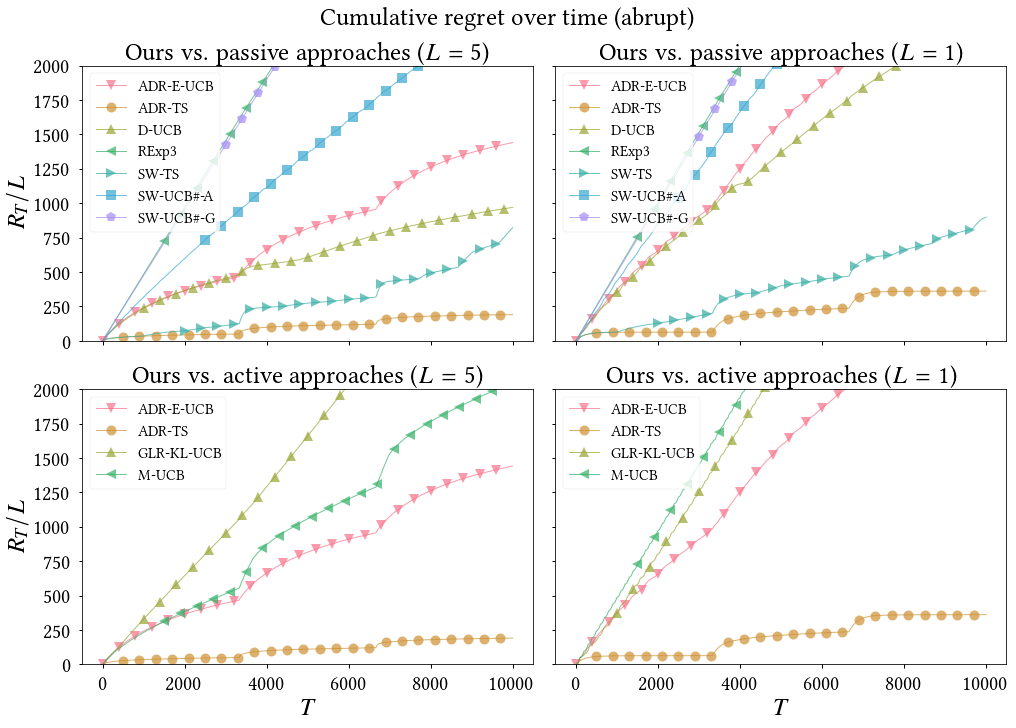

In [14]:
fig, axes = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(14,10), constrained_layout=True)

L = 5

plt.sca(axes[0][0])

i = 0
subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]
oracle = subdata[subdata["bandit"] == "CustomOracle"].gain.cumsum().reset_index(drop=True)
for bandit in algs_ours + algs_pass:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    ((oracle-cumsum)/L).plot(label=prettynames[bandit],linewidth=1, alpha=0.7,
                             markevery=(i*500,400), marker=markers[i] , markersize=10)
    i+=1

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)    
plt.legend(ncol=1, loc="upper left")
plt.ylabel("$R_T / L$")
plt.title("Ours vs. passive approaches ($L = %s$)"%L)

plt.sca(axes[1][0])

i = 0
subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]
oracle = subdata[subdata["bandit"] == "CustomOracle"].gain.cumsum().reset_index(drop=True)
for bandit in algs_ours + algs_act:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    ((oracle-cumsum)/L).plot(label=prettynames[bandit],linewidth=1, alpha=0.7,
                             markevery=(i*500,400), marker=markers[i] , markersize=10)
    i+=1

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)    
plt.legend(ncol=1, loc="upper left")
plt.ylabel("$R_T / L$")
plt.title("Ours vs. active approaches ($L = %s$)"%L)
plt.xlabel("$T$")


L = 1

plt.sca(axes[0][1])

i = 0
subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]
oracle = subdata[subdata["bandit"] == "CustomOracle"].gain.cumsum().reset_index(drop=True)
for bandit in algs_ours + algs_pass:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    ((oracle-cumsum)/L).plot(label=prettynames[bandit],linewidth=1, alpha=0.7,
                             markevery=(i*500,400), marker=markers[i] , markersize=10)
    i+=1

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)    
plt.legend(ncol=1, loc="upper left")
plt.title("Ours vs. passive approaches ($L = %s$)"%L)

plt.sca(axes[1][1])

i = 0
subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]
oracle = subdata[subdata["bandit"] == "CustomOracle"].gain.cumsum().reset_index(drop=True)
for bandit in algs_ours + algs_act:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    ((oracle-cumsum)/L).plot(label=prettynames[bandit],linewidth=1, alpha=0.7,
                             markevery=(i*500,400), marker=markers[i] , markersize=10)
    i+=1

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)    
plt.legend(ncol=1, loc="upper left")
plt.title("Ours vs. active approaches ($L = %s$)"%L)
plt.xlabel("$T$")

plt.ylim((0,2000))

#plt.tight_layout()

plt.suptitle("Cumulative regret over time (abrupt)", fontsize=25)
plt.savefig("plots/%s_regret_full_Fig10.pdf"%dataset)

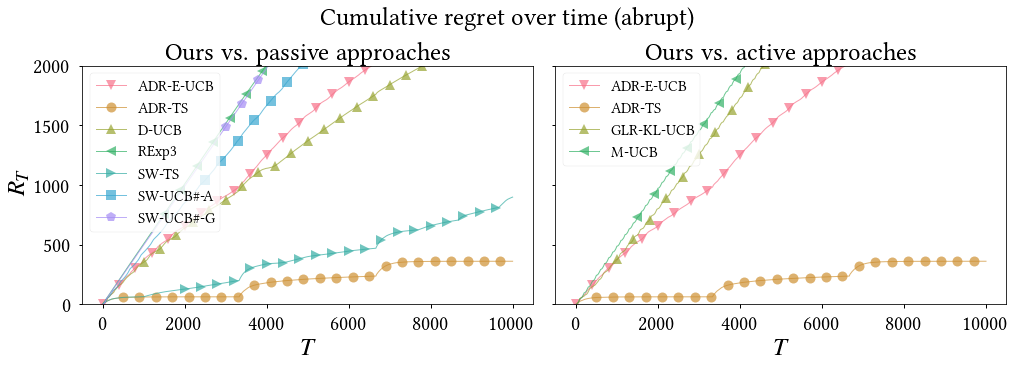

In [15]:
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(14,5), constrained_layout=True)

L = 1

plt.sca(axes[0])

i = 0
subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]
oracle = subdata[subdata["bandit"] == "CustomOracle"].gain.cumsum().reset_index(drop=True)
for bandit in algs_ours + algs_pass:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    ((oracle-cumsum)/L).plot(label=prettynames[bandit],linewidth=1, alpha=0.7,
                             markevery=(i*500,400), marker=markers[i] , markersize=10)
    i+=1

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)    
plt.legend(ncol=1, loc="upper left")
plt.title("Ours vs. passive approaches")
#plt.title("Ours vs. passive approaches ($L = %s$)"%L)
plt.xlabel("$T$")
plt.ylabel("$R_T$")
plt.sca(axes[1])

i = 0
subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]
oracle = subdata[subdata["bandit"] == "CustomOracle"].gain.cumsum().reset_index(drop=True)
for bandit in algs_ours + algs_act:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    ((oracle-cumsum)/L).plot(label=prettynames[bandit],linewidth=1, alpha=0.7,
                             markevery=(i*500,400), marker=markers[i] , markersize=10)
    i+=1

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(ncol=1, loc="upper left")
plt.title("Ours vs. active approaches")
#plt.title("Ours vs. active approaches ($L = %s$)"%L)
plt.xlabel("$T$")

plt.ylim((0,2000))

#plt.tight_layout()

plt.suptitle("Cumulative regret over time (abrupt)", fontsize=25)
plt.savefig("plots/%s_regret_Fig5b.pdf"%dataset)